<a href="https://colab.research.google.com/github/santanukumar666/Data-analysis-projects/blob/main/episource_assignment(loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
loan=pd.read_csv("loan_data.csv")

In [ ]:
loan.tail()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y
510,LP002990,Female,No,0,Graduate,Yes,0,Semiurban,medium,N


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


There are no null values and hence a lot of data cleaning and preprocessing time is saved.


## Find % of total applicants for each unique value of dependents.

In [ ]:
df_dependent=loan['Dependents'].value_counts().to_frame().reset_index().rename(columns={'index':'Dependents','Dependents':'count'})


fig = go.Figure([go.Pie(labels=df_dependent['Dependents'], values=df_dependent['count'],pull=[0,0])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Dependents Count ",title_x=0.5)
fig.show()

In [ ]:
df_dependent

,Dependents,count
0,0,294
1,2,88
2,1,85
3,3+,44


Total applicants for each unique value of dependents.

*   57.5 % applicants have 0 dependents
*   16.6 % applicants have 1 dependents

*   17.2 % applicants have 2 dependents
*   8.61 % applicants have 3+ dependents












In [ ]:
df_self=loan['Self_Employed'][loan['Application_Status']=='Y'].value_counts().reset_index().rename(columns={'index':'Application_status','Application_status':'count'})

fig = go.Figure([go.Pie(labels=df_self['Application_status'], values=df_self['Self_Employed'],pull=[0,0])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.update_layout(title="Self employed and loan approved ",title_x=0.5)
fig.show()

##46 people have be approved of loan who are self employed, while 301 people have been approved of loan who are not self employed.

#Find the % of applications approved for self-employed applicants.

##[46/511]*100 = 9.0019%   
[511 is the total number of applicants]

 ## What is the % of rejections for married male applicants?

In [ ]:
married_male_applicants=loan['Married'][loan['Gender']=='Male'][loan['Application_Status']=='N'].value_counts()
married_male_applicants

Yes    87
No     43
Name: Married, dtype: int64

87 applicants are married men whose loan applicantion were rejected.
In total their % is   [87/511]*100 = 17.025%


In [ ]:
married_male=loan.groupby(['Married','Gender','Application_Status']).count()
married_male

Application_ID  ...  Income
Married Gender Application_Status                  ...        
No      Female N                               26  ...      26
               Y                               40  ...      40
        Male   N                               43  ...      43
               Y                               71  ...      71
Yes     Female N                                8  ...       8
               Y                               17  ...      17
        Male   N                               87  ...      87
               Y                              219  ...     219

[8 rows x 7 columns]

### Out of 306 married males 87 were rejected.
### Their % is [87/306]*100 = 28.431% which goes along with the data.
Banks tend to approve the loans of married males as they tend to be settled and pay back their loans without much risk.

 ## Which property area has the maximum approval ratio.

In [ ]:
area=loan['Property_Area'][loan['Application_Status']=='Y'].value_counts()
area

Semiurban    153
Urban        104
Rural         90
Name: Property_Area, dtype: int64

### We can see that Semiurban area has the highest loan application status apporved.
 Applicant living in semiurban places tend to seek more loans than people living in urban places.Banks also eaily approve the loan applications of semiurban people easily than in rural places due to payback risk.

## Find average dependents per income group.

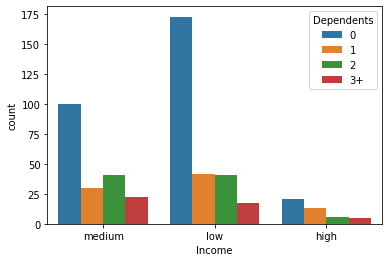

In [ ]:
sns.countplot(hue=loan.Dependents,x=loan.Income)

In [ ]:
loan.groupby(['Income','Dependents']).count()

Application_ID  Gender  ...  Property_Area  Application_Status
Income Dependents                          ...                                   
high   0                       21      21  ...             21                  21
       1                       13      13  ...             13                  13
       2                        6       6  ...              6                   6
       3+                       5       5  ...              5                   5
low    0                      173     173  ...            173                 173
       1                       42      42  ...             42                  42
       2                       41      41  ...             41                  41
       3+                      17      17  ...             17                  17
medium 0                      100     100  ...            100                 100
       1                       30      30  ...             30                  30
       2                       41      41  ...             41                  41
       3+                      22      22  ...             22                  22

[12 rows x 8 columns]

## Find the average number of dependents per applicant.

In [ ]:
df_dependent.mean()

count    127.75
dtype: float64

## Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.

Removing the identifiers

In [ ]:
loan.drop(['Application_ID'],axis=1,inplace=True)

In [ ]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Credit_History         int64
Property_Area         object
Income                object
Application_Status    object
dtype: object

#Feature engineering.
We cannot feed the model with string values.Hence we need to encode them/convert them in values suitable to be fed to the model.

In [ ]:
le = LabelEncoder()
loan["Gender"] = le.fit_transform(loan["Gender"])
loan["Married"] = le.fit_transform(loan["Married"])
loan["Dependents"] = le.fit_transform(loan["Dependents"])
loan["Self_Employed"] = le.fit_transform(loan["Self_Employed"])
loan["Education"] = le.fit_transform(loan["Education"])
loan["Property_Area"] = le.fit_transform(loan["Property_Area"])
loan["Income"] = le.fit_transform(loan["Income"])
loan["Application_Status"] = le.fit_transform(loan["Application_Status"])
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


Spliting the data to train and test.
We use most of the data to train our model and then test it using the test data.Here we used 0.2 of our data for testing.

In [ ]:
x=loan.drop(columns='Application_Status', axis=1)
y=loan['Application_Status']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=7)

Chose logistic regression as it gives better results in such problems

In [ ]:
model = LogisticRegression()
model.fit(x_train.values,y_train.values)

LogisticRegression()

We can user-feed the input data.

In [ ]:
input_data = (1,1,0,1,0,0,1,1)
input_= np.asarray(input_data)
input_data_reshaped = input_.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


# Accuracy
We should not be overwhelmed with this accuracy as accuracy is not a good evalution metrics.Data is imbalanced hence the accuracy will change if we change the random state value.

In [ ]:
predictions = model.predict(x_test.values)
print(accuracy_score(y_test, predictions)*100)

88.3495145631068


Confusion matrix is a much better evalution metrics.

In [ ]:
from sklearn.metrics import confusion_matrix 
pd.crosstab(y_test, predictions)

col_0,0,1
Application_Status,,
0,17,12
1,0,74
